In [11]:
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.rcParams['axes.unicode_minus'] = False

# 导入Excel文件
file_path = r"E:\数据表格\数据表格\《Python金融实战案例精粹（第2版）》的数据Excel文件\第4章\4.3 案例数据\中国人寿和南方航空的A股与美股收盘价数据.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')
df['日期']=pd.to_datetime(df['日期'])
# 计算日收益率（自然对数方式）
df['中国人寿（A股）收益率'] = np.log(df['中国人寿（A股）'] / df['中国人寿（A股）'].shift(1))
df['中国人寿（美股）收益率'] = np.log(df['中国人寿（美股）'] / df['中国人寿（美股）'].shift(1))
df['南方航空（A股）收益率'] = np.log(df['南方航空（A股）'] / df['南方航空（A股）'].shift(1))
df['南方航空（美股）收益率'] = np.log(df['南方航空（美股）'] / df['南方航空（美股）'].shift(1))

# 创建新的数据框存储收益率
returns_df = df[['日期', '中国人寿（A股）收益率', '中国人寿（美股）收益率', '南方航空（A股）收益率', '南方航空（美股）收益率']].dropna()

returns_df

,日期,中国人寿（A股）收益率,中国人寿（美股）收益率,南方航空（A股）收益率,南方航空（美股）收益率
1,2019-01-03,0.010471,-0.034100,0.018073,-0.041371
2,2019-01-04,0.016237,0.044581,0.020680,0.027102
3,2019-01-07,-0.012770,0.003784,0.027399,0.057474
4,2019-01-08,-0.011935,0.012201,-0.017217,0.009110
5,2019-01-09,0.016865,0.027601,0.008646,0.004991
...,...,...,...,...,...
643,2021-08-25,-0.003049,-0.001183,0.022828,0.031537
644,2021-08-26,-0.019531,-0.011905,-0.001738,0.016082
645,2021-08-27,0.019192,0.018980,-0.014011,-0.046552
646,2021-08-30,-0.029976,-0.007076,0.000000,0.014475


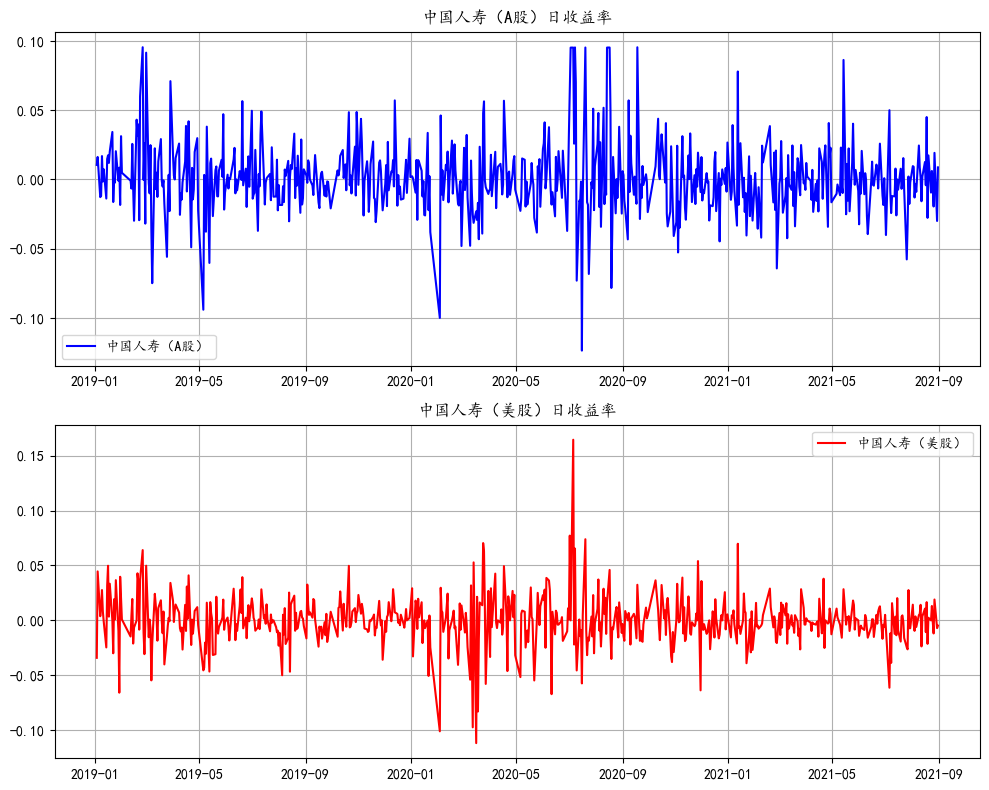

In [15]:
import matplotlib.pyplot as plt

# 创建2×1子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 绘制中国人寿A股日收益率
ax1.plot(returns_df['日期'], returns_df['中国人寿（A股）收益率'], label='中国人寿（A股）', color='blue')
ax1.set_title('中国人寿（A股）日收益率')
ax1.legend()
ax1.grid()
# 绘制中国人寿美股日收益率
ax2.plot(returns_df['日期'], returns_df['中国人寿（美股）收益率'], label='中国人寿（美股）', color='red')
ax2.set_title('中国人寿（美股）日收益率')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()

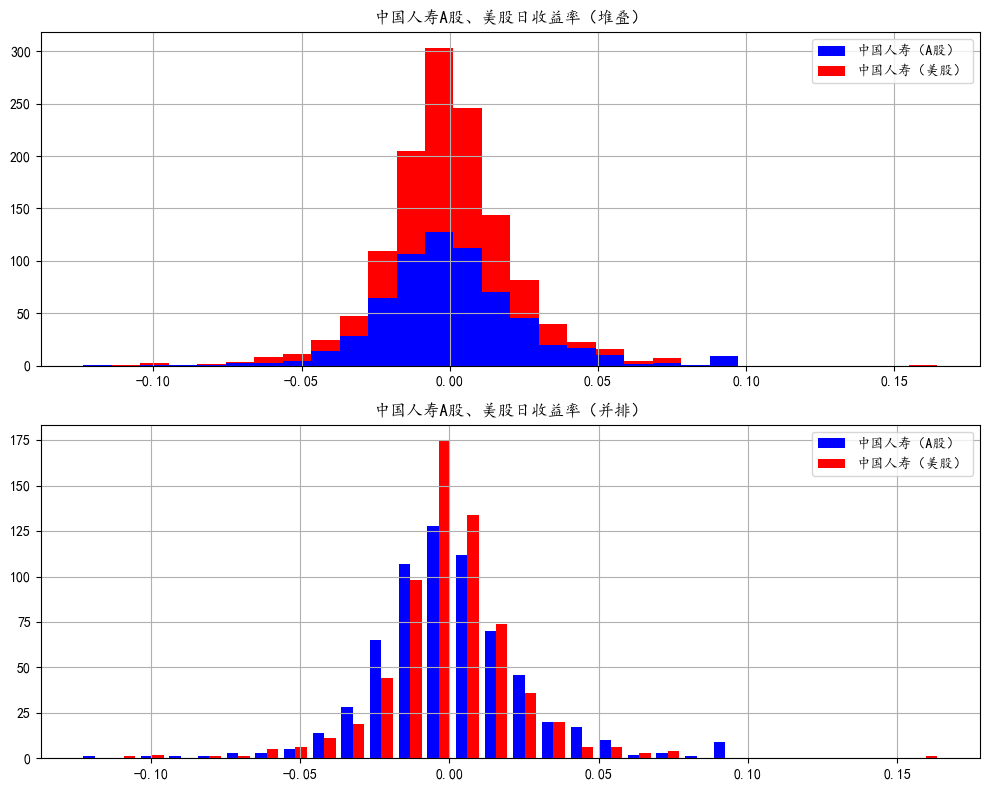

In [14]:
# 创建2×1子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 堆叠直方图
ax1.hist([returns_df['中国人寿（A股）收益率'], returns_df['中国人寿（美股）收益率']], bins=30, stacked=True, label=['中国人寿（A股）', '中国人寿（美股）'], color=['blue', 'red'])
ax1.set_title('中国人寿A股、美股日收益率（堆叠）')
ax1.legend()
ax1.grid()

# 并排直方图
ax2.hist([returns_df['中国人寿（A股）收益率'], returns_df['中国人寿（美股）收益率']], bins=30, label=['中国人寿（A股）', '中国人寿（美股）'], color=['blue', 'red'])
ax2.set_title('中国人寿A股、美股日收益率（并排）')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()

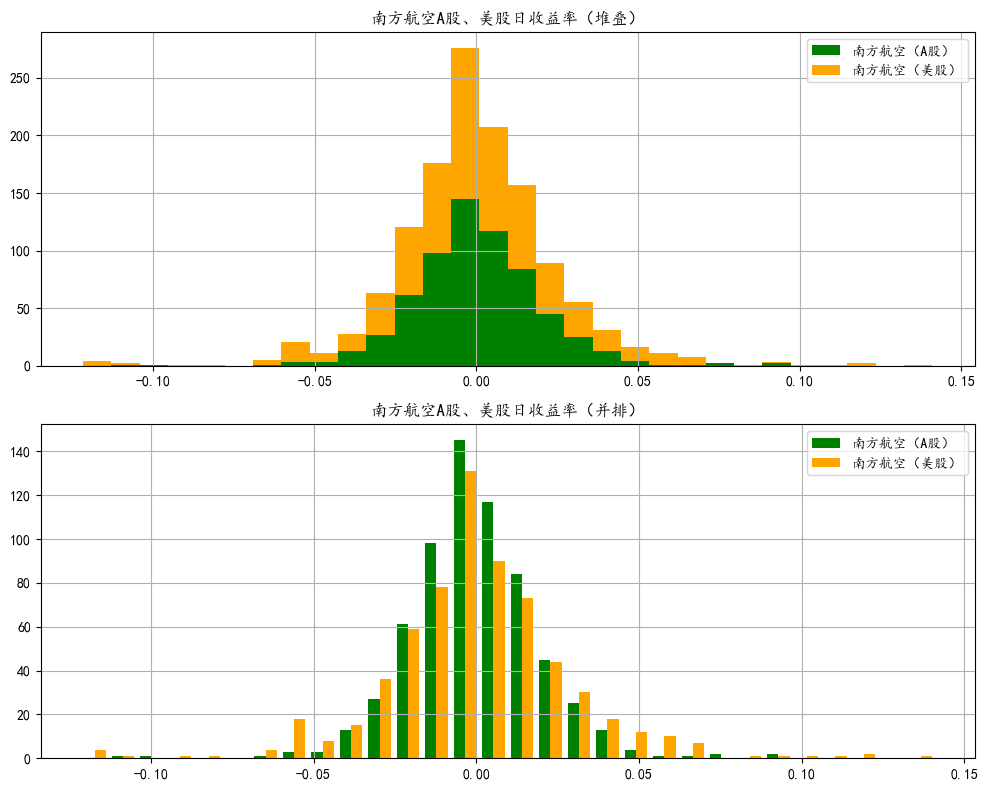

In [18]:
# 创建2×1子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 堆叠直方图
ax1.hist([returns_df['南方航空（A股）收益率'], returns_df['南方航空（美股）收益率']], bins=30, stacked=True, label=['南方航空（A股）', '南方航空（美股）'], color=['green', 'orange'])
ax1.set_title('南方航空A股、美股日收益率（堆叠）')
ax1.legend()
ax1.grid()
# 并排直方图
ax2.hist([returns_df['南方航空（A股）收益率'], returns_df['南方航空（美股）收益率']], bins=30, label=['南方航空（A股）', '南方航空（美股）'], color=['green', 'orange'])
ax2.set_title('南方航空A股、美股日收益率（并排）')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

# 导入Excel文件
file_path = r"E:\数据表格\数据表格\《Python金融实战案例精粹（第2版）》的数据Excel文件\第4章\4.8 案例数据\沪深300指数和中证500指数的数据.xlsx"
# 读取沪深300指数数据，显式指定日期列数据类型
hs300_df = pd.read_excel(file_path, sheet_name='沪深300指数', parse_dates=['日期']) 

# 读取中证500指数数据，显式指定日期列数据类型
zz500_df = pd.read_excel(file_path, sheet_name='中证500指数', parse_dates=['日期']) 

In [37]:
import mplfinance as mpf
print(mpf.__version__)

0.12.10b0


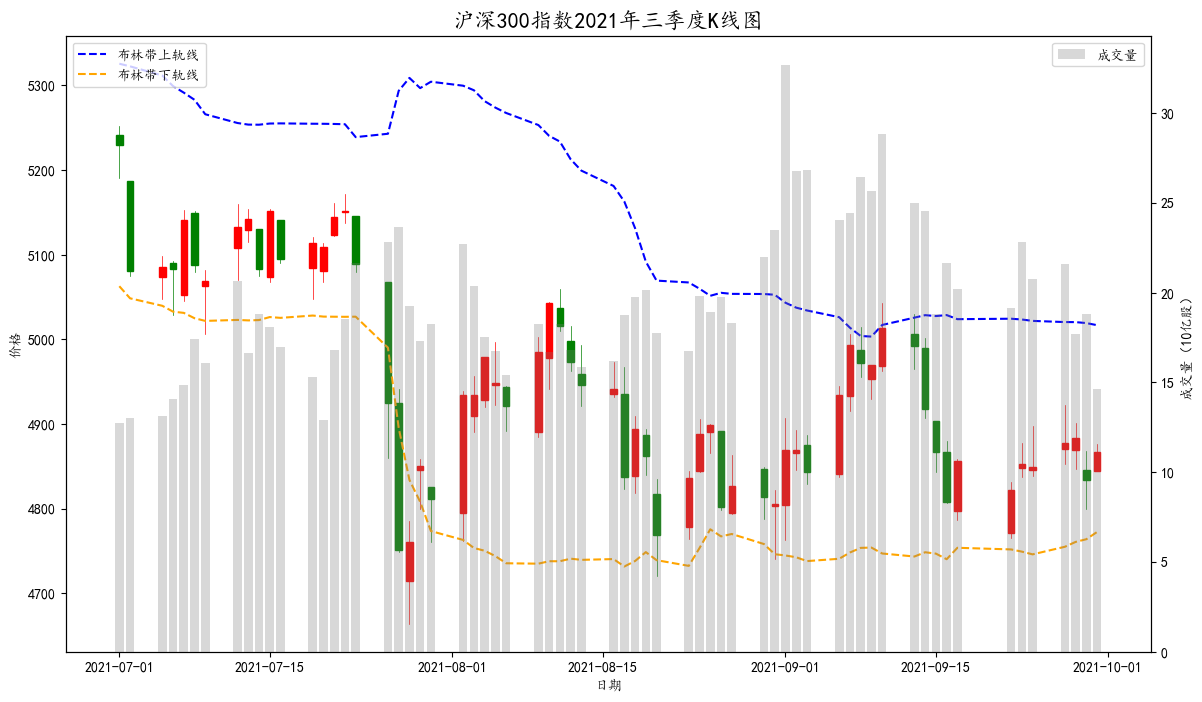

In [38]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# 准备数据
hs300_df['日期'] = pd.to_datetime(hs300_df['日期'])
hs300_df['日期'] = hs300_df['日期'].map(mdates.date2num)

# 创建子图
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制K线图
candlestick_ohlc(ax, hs300_df[['日期', '开盘价', '最高价', '最低价', '收盘价']].values, width=0.6, colorup='red', colordown='green')

# 绘制布林带
ax.plot(hs300_df['日期'], hs300_df['布林带上轨线'], label='布林带上轨线', color='blue', linestyle='--')
ax.plot(hs300_df['日期'], hs300_df['布林带下轨线'], label='布林带下轨线', color='orange', linestyle='--')

# 绘制成交量
ax2 = ax.twinx()
ax2.bar(hs300_df['日期'], hs300_df['成交量（10亿股）'], color='gray', alpha=0.3, label='成交量')

# 设置日期格式
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 设置标签和标题
ax.set_title('沪深300指数2021年三季度K线图', fontsize=16)
ax.set_xlabel('日期')
ax.set_ylabel('价格')
ax2.set_ylabel('成交量（10亿股）')

# 显示图例
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

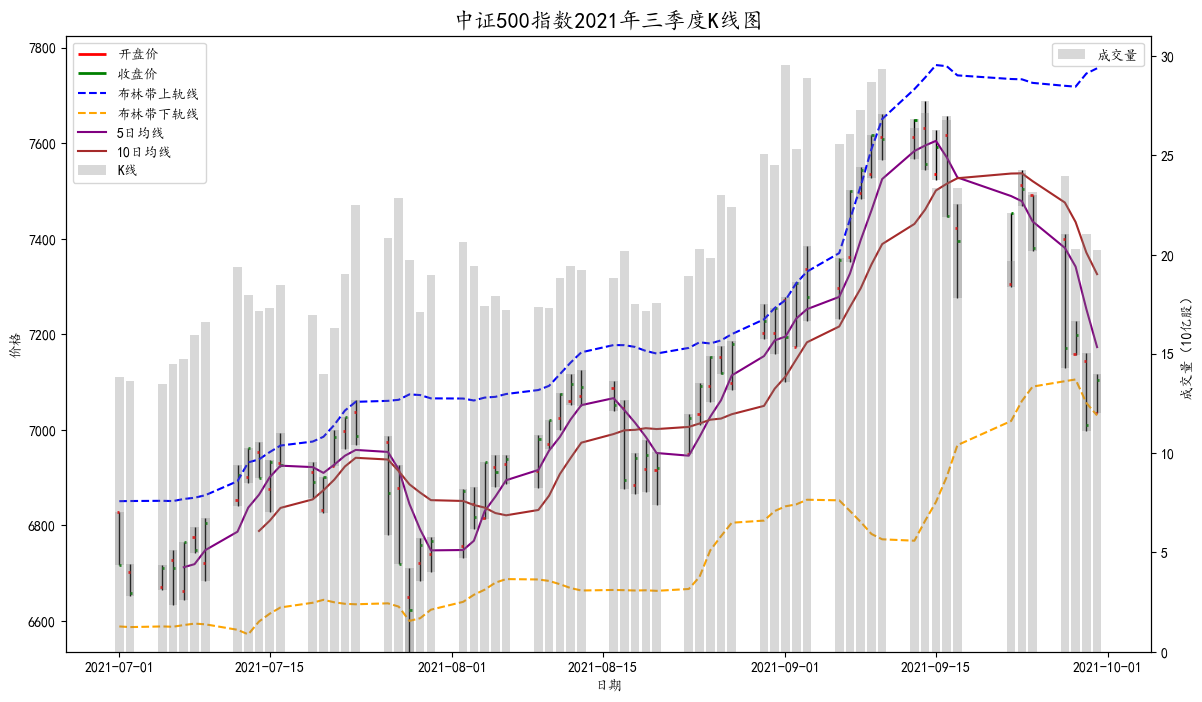

In [39]:
# 准备数据
zz500_df['日期'] = pd.to_datetime(zz500_df['日期'])
zz500_df['日期'] = zz500_df['日期'].map(mdates.date2num)

# 计算5日均线和10日均线
zz500_df['5日均线'] = zz500_df['收盘价'].rolling(window=5).mean()
zz500_df['10日均线'] = zz500_df['收盘价'].rolling(window=10).mean()

# 创建子图
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制K线图（条形图）
ax.bar(zz500_df['日期'], zz500_df['最高价'] - zz500_df['最低价'], bottom=zz500_df['最低价'], color='gray', alpha=0.3, label='K线')
ax.vlines(zz500_df['日期'], zz500_df['最低价'], zz500_df['最高价'], color='black', linewidth=1)
ax.hlines(zz500_df['开盘价'], zz500_df['日期'] - 0.2, zz500_df['日期'], color='red', linewidth=2, label='开盘价')
ax.hlines(zz500_df['收盘价'], zz500_df['日期'], zz500_df['日期'] + 0.2, color='green', linewidth=2, label='收盘价')

# 绘制布林带
ax.plot(zz500_df['日期'], zz500_df['布林带上轨线'], label='布林带上轨线', color='blue', linestyle='--')
ax.plot(zz500_df['日期'], zz500_df['布林带下轨线'], label='布林带下轨线', color='orange', linestyle='--')

# 绘制5日均线和10日均线
ax.plot(zz500_df['日期'], zz500_df['5日均线'], label='5日均线', color='purple', linestyle='-')
ax.plot(zz500_df['日期'], zz500_df['10日均线'], label='10日均线', color='brown', linestyle='-')

# 绘制成交量
ax2 = ax.twinx()
ax2.bar(zz500_df['日期'], zz500_df['成交量（10亿股）'], color='gray', alpha=0.3, label='成交量')

# 设置日期格式
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 设置标签和标题
ax.set_title('中证500指数2021年三季度K线图', fontsize=16)
ax.set_xlabel('日期')
ax.set_ylabel('价格')
ax2.set_ylabel('成交量（10亿股）')

# 显示图例
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()